In [1]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [2]:
# additional imports

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model

In [3]:
# Load in the data
cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()
print("x_train.shape:", x_train.shape)
print("y_train.shape", y_train.shape)

x_train.shape: (50000, 32, 32, 3)
y_train.shape (50000,)


In [4]:
# number of classes
K = len(set(y_train))
print("number of classes:", K)

number of classes: 10


In [5]:
# Build the model using the functional API
i = Input(shape=x_train[0].shape)
# x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
# x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
# x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.2)(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.2)(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.2)(x)

# x = GlobalMaxPooling2D()(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [6]:
# Compile
# Note: make sure you are using the GPU for this!
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
# Fit
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50)

Epoch 1/50
1563/1563 [==============================] - 13s 8ms/step - loss: 1.2911 - accuracy: 0.5552 - val_loss: 1.0971 - val_accuracy: 0.6346
Epoch 2/50
1563/1563 [==============================] - 12s 8ms/step - loss: 0.8434 - accuracy: 0.7052 - val_loss: 0.9171 - val_accuracy: 0.6931
Epoch 3/50
1563/1563 [==============================] - 12s 8ms/step - loss: 0.6974 - accuracy: 0.7607 - val_loss: 0.7292 - val_accuracy: 0.7499
Epoch 4/50
1563/1563 [==============================] - 12s 8ms/step - loss: 0.5874 - accuracy: 0.8012 - val_loss: 0.6831 - val_accuracy: 0.7724
Epoch 5/50
1563/1563 [==============================] - 12s 8ms/step - loss: 0.4968 - accuracy: 0.8291 - val_loss: 0.6148 - val_accuracy: 0.7984
Epoch 6/50
1563/1563 [==============================] - 12s 8ms/step - loss: 0.4208 - accuracy: 0.8559 - val_loss: 0.6924 - val_accuracy: 0.7756
Epoch 7/50
1563/1563 [==============================] - 12s 8ms/step - loss: 0.3569 - accuracy: 0.8771 - val_loss: 0.6290 - val_ac

In [7]:
# Fit with data augmentation
# Note: if you run this AFTER calling the previous model.fit(), it will CONTINUE training where it left off
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(x_train, y_train, batch_size)
steps_per_epoch = x_train.shape[0] // batch_size
r = model.fit_generator(train_generator, validation_data=(x_test, y_test), steps_per_epoch=steps_per_epoch, epochs=50)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
1562/1562 [==============================] - 26s 17ms/step - loss: 1.4528 - accuracy: 0.4937 - val_loss: 1.3206 - val_accuracy: 0.5451
Epoch 2/50
1562/1562 [==============================] - 26s 16ms/step - loss: 1.0017 - accuracy: 0.6499 - val_loss: 1.0008 - val_accuracy: 0.6644
Epoch 3/50
1562/1562 [==============================] - 26s 17ms/step - loss: 0.8533 - accuracy: 0.7033 - val_loss: 0.7260 - val_accuracy: 0.7524
Epoch 4/50
1562/1562 [==============================] - 26s 17ms/step - loss: 0.7582 - accuracy: 0.7398 - val_loss: 0.6738 - val_accuracy: 0.7694
Epoch 5/50
1562/1562 [==============================] - 26s 16ms/step - loss: 0.6857 - accuracy: 0.7655 - val_loss: 0.6775 - val_accuracy: 0.7702
Epoch 6/50
1562/1562 [==============================] - 26s 17ms/step - loss: 0.6382 - accuracy: 0.7818 - val_loss: 0.6337 - val_accuracy: 0.7859
Epoch 7/50
1562/1562 [==========================

**Observation:**

We are getting a lower training accuracy but a higher Validation accuracy. Hence, there is lesser Overfitting. Therefore, the model has improved.

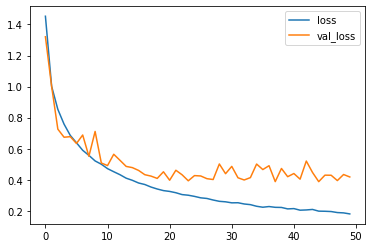

In [8]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

**Observation:**

A much better learning curve than before. 

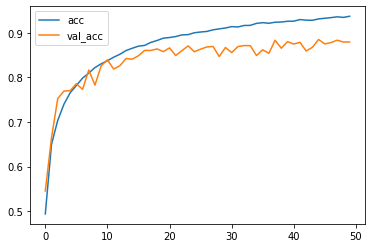

In [9]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

Confusion matrix, without normalization
[[931   6  24   3   2   0   4   2  17  11]
 [  3 952   0   0   0   0   2   0   3  40]
 [ 27   1 834  31  26  23  43   8   4   3]
 [ 20   5  43 758  28  61  45  14  11  15]
 [ 10   1  35  23 871  14  28  12   6   0]
 [  7   4  31 109  23 772  21  19   4  10]
 [  3   1  19  27   6   8 932   0   2   2]
 [ 15   2   8  26  25  13   3 901   1   6]
 [ 47  13   9   4   2   1   1   0 900  23]
 [  8  36   0   3   0   3   0   0   6 944]]


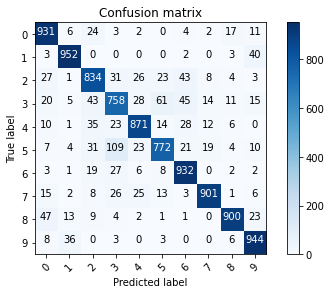

In [10]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))



**Observation:** 
Much lesser misclassifications as promised before.


Lets check the two most wrong predictions.

a. True Label = 5, Predicted Label = 3, Value = 119

b. True Label = 3, Predicted Label = 5, Value = 71

c True Label = 3, Predicted Label = 6, Value = 52

d. b. True Label = 7, Predicted Label = 4, Value = 20

So, in 'a' and 'b', 3 and 5 are getting confused very often, i.e. the Cats and Dogs are getting confused very often. And that does make sense to me because the images are so small that its easy to confuse a cat with a dog.

In 'c', 3 'cat' and 6 'frog' are getting confused too. That too makes sense to me because if we look at frog in this dataset, they just appear as little brown blobs.

In 'd', 7 'horse' and 4 'deer' are getting confused too. That too makes sense to me because they are both 4 legged animal that kind of look the same. 

In [11]:
# label mapping
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

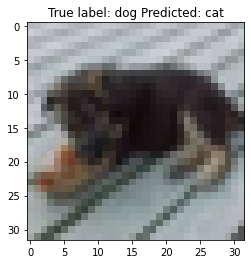

In [13]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));

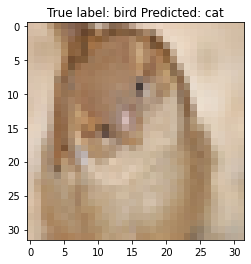

In [12]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));

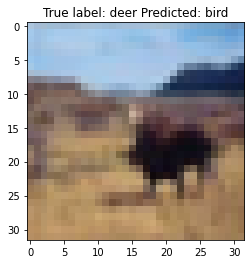

In [13]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));

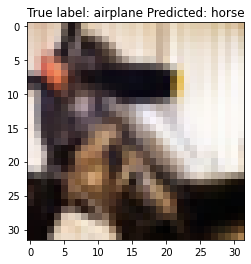

In [14]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));

In [15]:
# Now that the model is so large, it's useful to summarize it
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)       